# IF240 - Apprentissage et deep learning

## Assignment 1: Kmeans, Naive Bayes, SVM 

By Aurélie Bugeau


### Objectives 
The objective is to apply classification algorithms for digit recognition

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(8, 5, figsize=(8, 12))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
i=0
for axi in ax.flat:
    axi.set(xticks=[], yticks=[])
    axi.set_title("label=%d"%digits.target[i] )
    axi.imshow(digits.images[i], interpolation='nearest', cmap=plt.cm.binary)
    i+=1

(1797, 64)


### Question 1 - Kmeans
Apply kmeans to cluster this dataset. Visualize the resulting centroids as images after reshaping them. 
Check to which cluster is assigned each data as in a classification problem. Analyse the results.

Be careful: the index of the clusters you find do not mandatorily correspond to the digit value (initial label). One way to find which label corresponds to each cluster is to visualise the centroid images, or to compute the mode of each class in the groundtruth
`
import numpy as np
from scipy.stats import mode
labels = np.zeros_like(Y)
for i in range(10):
    indices = np.where(y_pred == i)[0]
    labels[indices] = mode(digits.target[indices])[0]
    `

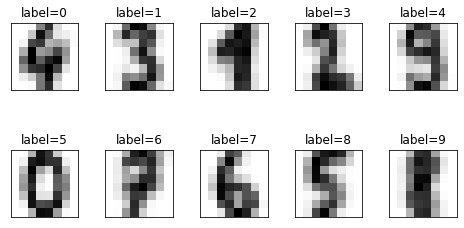

In [9]:
from sklearn.cluster import KMeans
import numpy as np
from scipy.stats import mode
from sklearn import metrics
from seaborn import heatmap

# Globals 

X=digits.data
Y=digits.target
n_clusters = 10
image_shape = digits.images.shape[1:]

# Apply KMeans

clustering = KMeans(n_clusters, random_state = 0).fit(X)

# Retrieve KMeans results : centroids and corresponding labels

centroids = clustering.cluster_centers_
labels = clustering.labels_

images_centroids = np.zeros((n_clusters,image_shape[0],image_shape[1]))

# Reshape dataset to get 8x8 images from shape 64 vectors

for i in range(n_clusters):
    images_centroids[i] = np.reshape(centroids[i], image_shape)
    
# Affect true labels to dataset according to the initial ones

true_labels = np.zeros_like(Y)
for i in range(10):
    indices = np.where(labels == i)[0]
    true_labels[indices] = mode(Y[indices])[0]

# Plot the centroids returned by KMeans

fig, ax = plt.subplots(2, 5, figsize=(8, 4))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
i=0
for axi in ax.flat:
    axi.set(xticks=[], yticks=[])
    axi.set_title("label=%d"%i)
    axi.imshow(images_centroids[i], interpolation='nearest', cmap=plt.cm.binary)
    i+=1
    

    
 



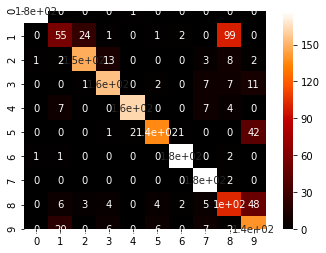

In [11]:
# Statistics on the result obtained (confusion matrix)

#https://seaborn.pydata.org/generated/seaborn.heatmap.html

confution_matrix = metrics.confusion_matrix(Y, true_labels, labels=range(n_clusters))
ax = heatmap(confution_matrix, annot=True, cmap="gist_heat", square=True, linecolor="white")
plt.show()

### Question 2
Apply Naive Bayes classification to the digit classification problem. Analyse your results.


### Question 3
Apply SVM classification to the digit classification problem. Analyse your results.
